In [1]:
%matplotlib inline
! export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$CONDA_PREFIX/lib/
from __future__ import print_function
import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from data import load_train_data, load_test_data,plot_imagesT,destroy_train_test
import pdb
from skimage.io import imsave, imread
import cv2
import pickle
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import data
import pylab
import imageio
import matplotlib.pyplot as plt
#from  gen_data import load_image,random_batch,test_batch,load_images
from  get_resUnet import *
import params 
from os.path import splitext
from keras.utils import plot_model
from pathlib import Path
#import dask.array as da
#from dask.delayed import delayed
from dataloaders import *
print("finished imports")

2022-07-30 17:03:38.341571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-10.1/lib64:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:
2022-07-30 17:03:38.341636: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
finished imports


In [2]:
netparam=params.init() 
netprameval=params.init(train=0) 


{'img_rows': 224, 'img_cols': 224, 'network': 'MulResNet', 'task': 'all', 'loss': 'CE', 'learning_rate': 0.0001, 'optimizer': 'adam', 'batch_size': 10, 'epoch_size': 1, 'CLAHE': False, 'nb_epoch': 40, 'cycle_start_epoch': 23, 'predict_batch_size': 5, 'CROP': False, 'Flip': False, 'perspective': False, 'lighting': False, 'affine': False, 'randcrop': False, 'dbg': False, 'save_images': True, 'include_top': False, 'weights': 'imagenet', 'data_path': '/home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_train', 'data_path_test': '/home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_test'}


In [3]:
res = data.destroy_train_test()
print(res)

rm imgs_id_test.npy imgs_mask_trainPath.npy imgs_test.npy imgs_trainPath.npy 


In [4]:
data.create_train_data(netparam)
print("------------\nfinished create_train_data\n------------")
data.create_test_data(netparam)
print("netparam",netparam)

create_train_data data_path /home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_train
create_train_data -> images: Needle_Passing_S02_T01...Needle_Passing_S02_T01
There will be 180 images in the final train set
------------------------------
Creating trainig images...
------------------------------
len(images) 1
create_train_data -> for each images -> loop  /home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_train/Needle_Passing_S02_T01/ground_truth
Done: 0/180 images
Loading done.
Saving to .npy files done.
Loading done.
------------
finished create_train_data
------------
create_train_data -> images: Needle_Passing_S02_T01...Needle_Passing_S02_T01
There will be 28 images in the final test set
------------------------------
Creating trainig images...
------------------------------
create_train_data -> for each images -> loop  /home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_test/Needle_Passing_S02_T01/ground_tr

In [5]:
netparam.task

'all'

In [6]:

imgs_train, imgs_mask_train=data.load_train_data()

In [7]:
imgs_test,  imgs_mask_test =data.load_test_data()

In [8]:

train_setT=np.shape(imgs_train)
print("imgs_train, imgs_mask_train",len(imgs_train), len(imgs_mask_train))
print("imgs_test,  imgs_mask_test",len(imgs_test), len(imgs_mask_test))

imgs_train, imgs_mask_train 180 180
imgs_test,  imgs_mask_test 28 28


In [9]:
imgs_test[27]

array(['/home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_test/Needle_Passing_S02_T01/left_frames/frame_3013.png',
       '/home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_test/Needle_Passing_S02_T01/right_frames/frame_3013.png'],
      dtype='<U131')

In [10]:
imgs_mask_test[27]

'/home/student/Documents/GitHub/StreoScenNet-fork/Datasets/dV/Needle_Passing_test/Needle_Passing_S02_T01/ground_truth/frame_3013.png'

In [11]:
np.random.seed(1234)
ids_train = np.random.choice(len(imgs_train), size=int(len(imgs_train)/1), replace=False)
print("ids_train",ids_train,"from:len(imgs_train)",len(imgs_train),"is",len(ids_train),"length")
ids_val = np.random.choice(len(imgs_test), size=int(len(imgs_test)/1), replace=False)
print("ids_val",ids_val,"from:len(imgs_test)",len(imgs_test),"is",len(ids_val),"length")

ids_train [157 145 125 131 146  95 165  74  91  39  77 102  31 172 167  40   9  54
 142  79  49  43 123 177 122  63  25  59   6  51  29 121 149 174 111  48
 105  65  58  27  88  92  32  99 108 160 133  11  61 155 132  17 119  83
 129  35  20 136 104 164  42  66 150 169  36 101  57 162 166  94 135 175
 114  24  44   8  56  22  97  93 168 151  73  12 171 153 147   1 134 156
  64  52 144  68  71  21  33  90 126   0 137 106  62 161 173  78  55 138
 103  82   4  28  10 170  15 117 141 130 110   5  67 100   7 178 109 159
  98  46  85  18 179  86  70  72  41  16  45  84  89 113  96 176  13  87
  81 148  60  14 107 115 140  19   2   3 163  75 128 139  34  37  76  50
 127  80  69 112 120 118  26 124 158  30 154  23 143 152 116  53  38  47] from:len(imgs_train) 180 is 180 length
ids_val [ 5 22  6 17 12 24 18 15 16  9 19 21  7  0 13 26  3 27  4 14  1  8  2 23
 11 25 20 10] from:len(imgs_test) 28 is 28 length


In [12]:
x=[[1,3],[2,5],[4,8],[6,7]]
d1=str(x[3][0])
d2=str(x[3][1])

In [35]:
ids_train=[i for i, s in enumerate(imgs_mask_train) if 'instrument_dataset_'+d1  not in s and 'instrument_dataset_'+d2  not in s]
#print("imgs_mask_train:",imgs_mask_train,"is len",len(ids_train))


In [ ]:

ids_val = [i for i, s in enumerate(imgs_mask_test) if 'instrument_dataset_'+d1   in s or 'instrument_dataset_'+d2   in s]
print("imgs_mask_test",imgs_mask_test,"is len",len(ids_val))

In [13]:
print("Data Information: Evaluation on %s and %s"% (d1,d2))
print("------")
print("  - No of Frames in Training set: %d" % len(ids_train))
print("  - No of Frames in Test set %d" % len(ids_val))

Data Information: Evaluation on 6 and 7
------
  - No of Frames in Training set: 180
  - No of Frames in Test set 28


In [14]:
len(imgs_train)

180

In [15]:
datagen = CustomImageDataGenerator(netparam, training =0)

trainflow=datagen.flow(imgs_train, imgs_mask_train, batch_size=8)

In [16]:
x_batch,x_batch_right, y_batch,_ = trainflow.next()

In [17]:
y_batch.shape

(8, 224, 224, 3)

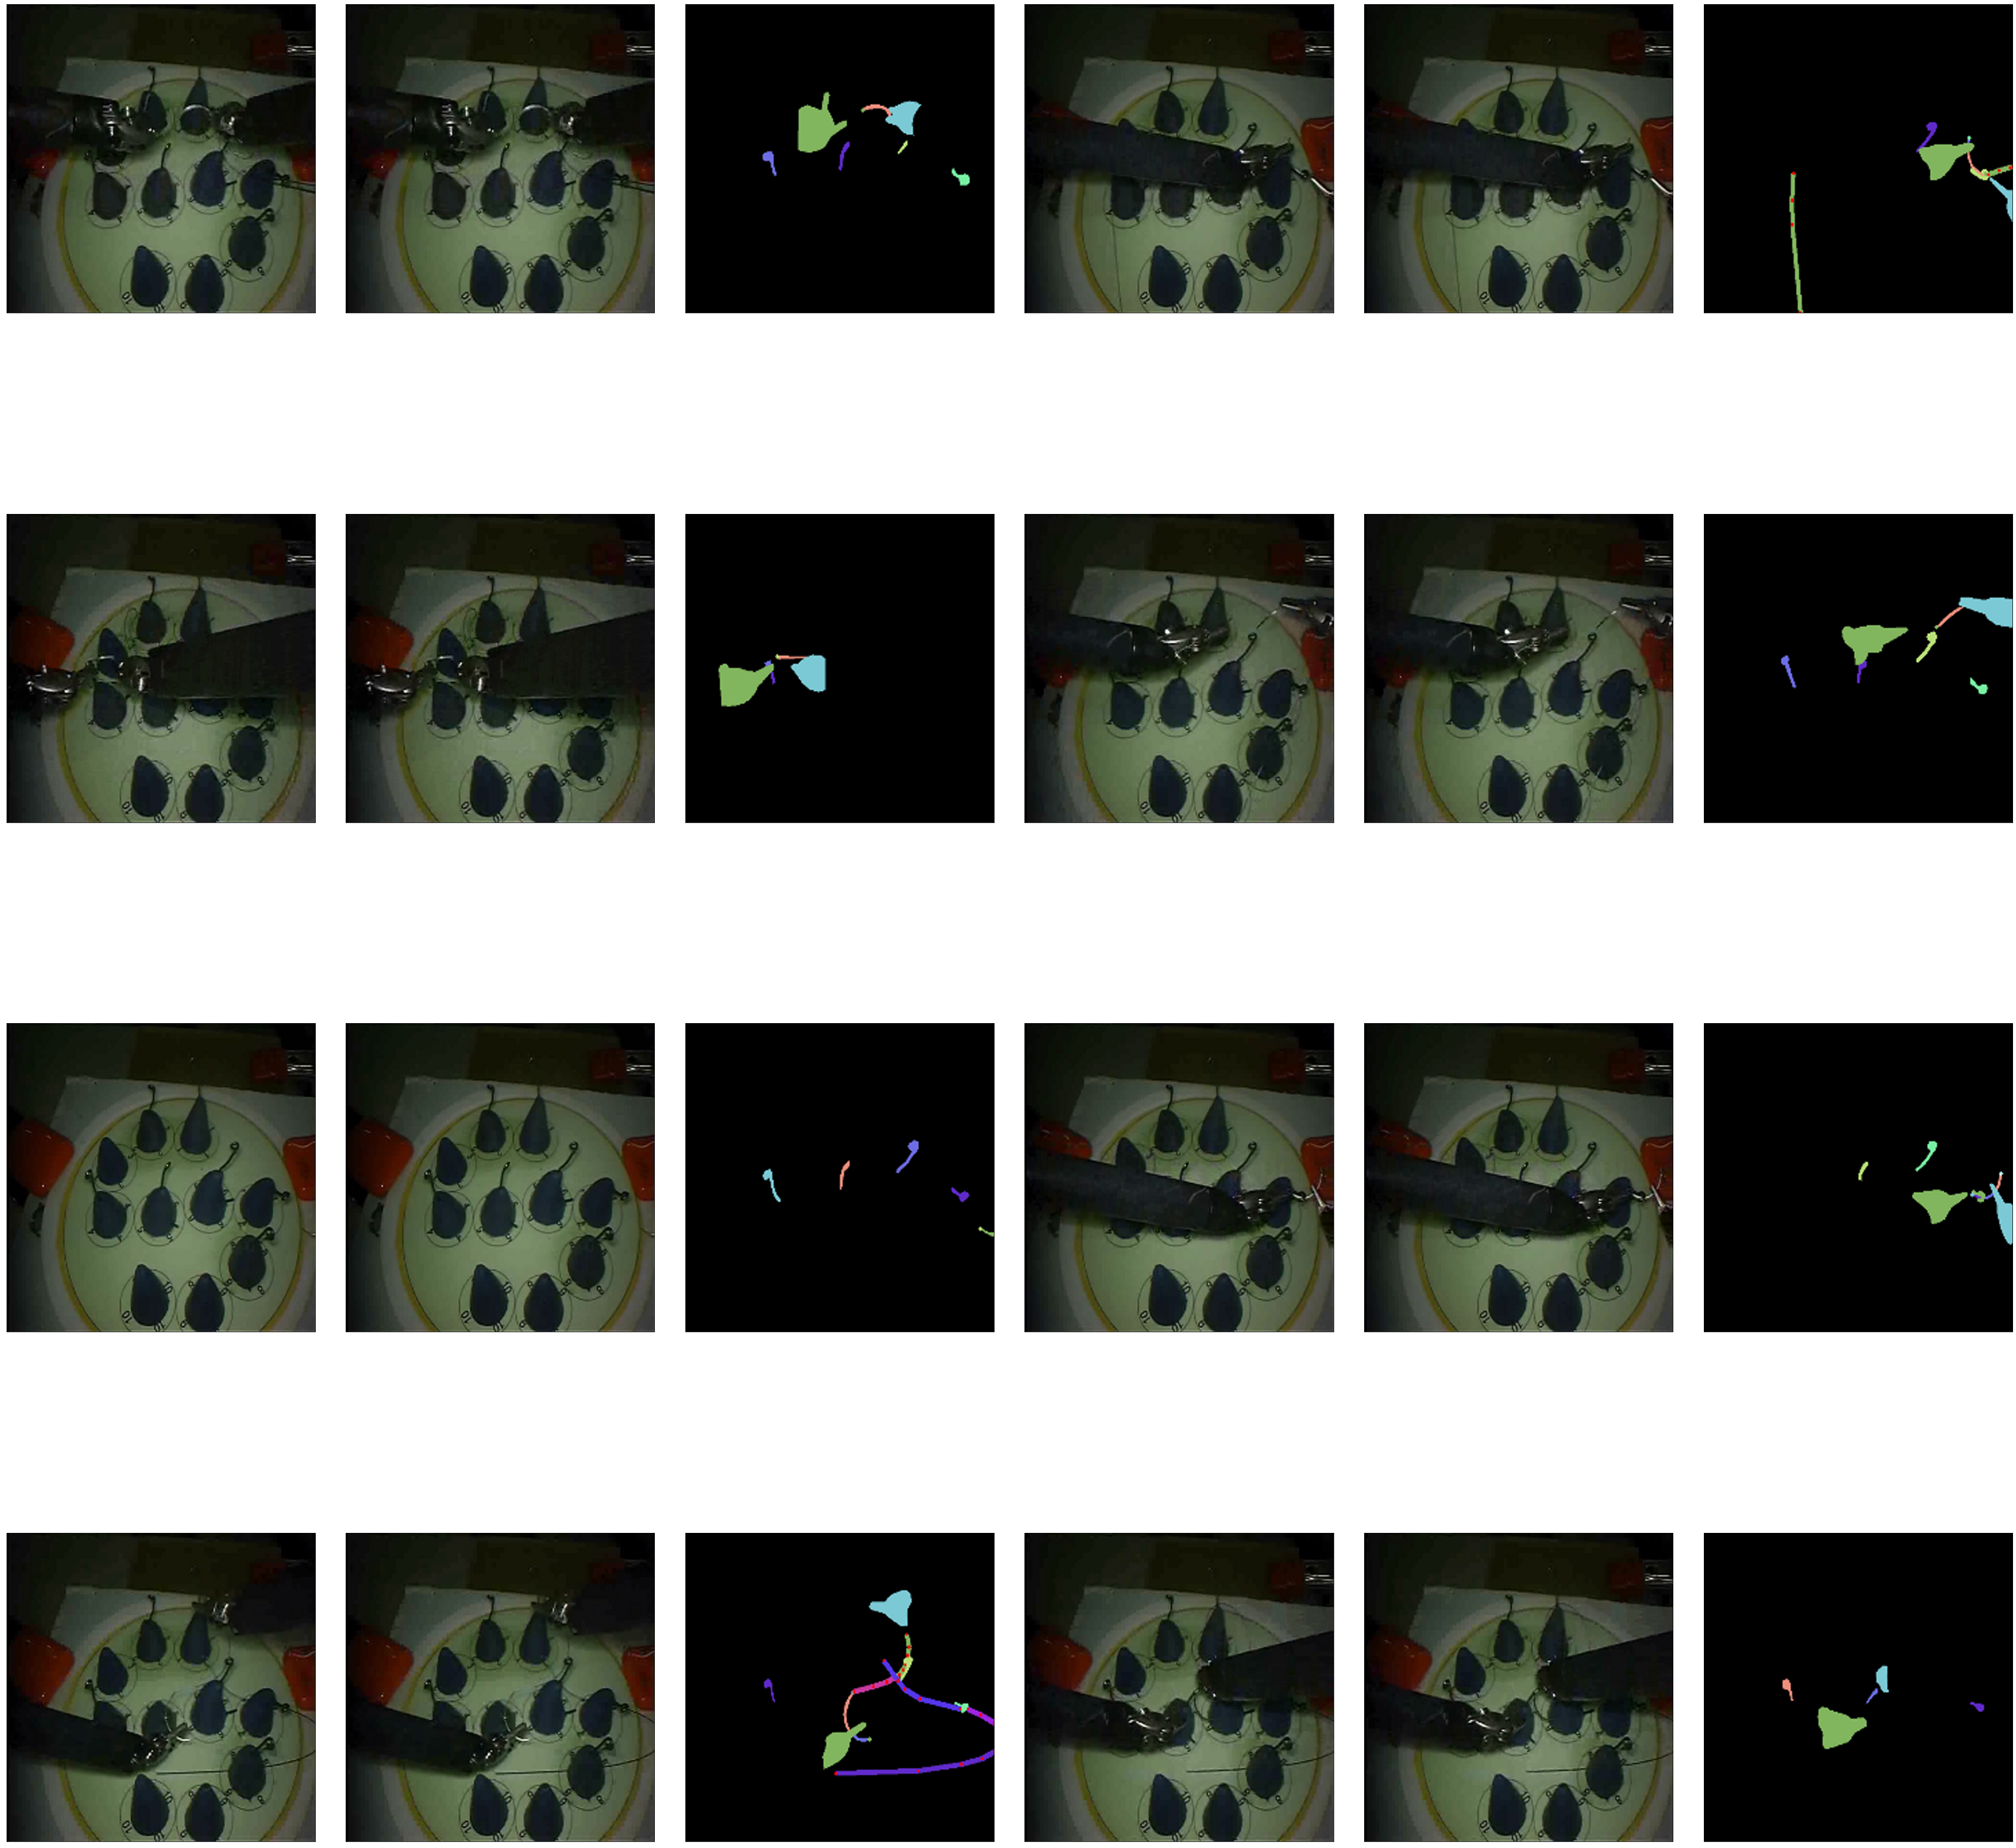

In [18]:

#x_batch, y_batch,_ = trainflow.next()
plot_imagesT((x_batch[:,:,:,0:3]*255).astype(np.uint8),(x_batch_right[:,:,:,0:3]*255).astype(np.uint8), np.squeeze(y_batch*255), cls_pred=None, smooth=True, filename='test.png')

In [19]:
y_batch.shape

(8, 224, 224, 3)

In [20]:

imgs_test=[imgs_test[img] for img in ids_val]
imgs_mask_test=[imgs_mask_test[img] for img in ids_val]

#ids_val_batch = np.random.choice(len(imgs_test), size=val_num, replace=False)
imgs_test=np.array(imgs_test)
imgs_mask_test=np.array(imgs_mask_test)
print("imgs_test:imgs_mask_test",len(imgs_test),len(imgs_mask_test))
#imgs_mask_test =imgs_mask_test[ids_val_batch]


imgs_test:imgs_mask_test 28 28


In [21]:

imgs_train=[imgs_train[img] for img in ids_train]
imgs_mask_train=[imgs_mask_train[img] for img in ids_train]


imgs_train=np.array(imgs_train)
imgs_mask_train=np.array(imgs_mask_train)
print("imgs_train:imgs_mask_train",len(imgs_train),len(imgs_mask_train))

imgs_train:imgs_mask_train 180 180


In [22]:
trainflow=datagen.flow(imgs_train, imgs_mask_train, batch_size=1)
x_batch,x_batch_right, y_batch,_ = trainflow.next()


In [23]:
y_batch.shape

(1, 224, 224, 3)

In [24]:
batchsize=10
 
Traindatagen =CustomImageDataGenerator(netparam,training=1)

Validdatagen= CustomImageDataGenerator(netprameval,training=1)


In [25]:
trainflow=Traindatagen.flow(imgs_train, imgs_mask_train, batch_size=1)
x_batch,x_batch_right, y_batch,_ = trainflow.next()

In [26]:
y_batch.shape


(1, 224, 224, 11)

In [27]:


def train_generator():
    trainflow=Traindatagen.flow(imgs_train, imgs_mask_train, batch_size=batchsize)
    while True:
        x_batch,x_batch_right, y_batch,_ = trainflow.next()
        #pdb.set_trace()
        yield [x_batch,x_batch_right], y_batch
print("finished train_generator")


finished train_generator


In [28]:

def valid_generator():
    validflow=Validdatagen.flow(imgs_test, imgs_mask_test, batch_size=batchsize)
    while True:
        x_batch,x_batch_right, y_batch,_ = validflow.next()
#        pdb.set_trace()
        yield [x_batch, x_batch_right],y_batch


In [29]:

model =YnetResNet(netparam)
filename='YnetResNet2017_'+netparam.task+'_v'+d1+d2+'.hdf5'
logdirs='%s%s'%(splitext(filename)[0],'logs')
print("finished get YnetResNet")


2022-07-30 17:08:03.363458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 17:08:03.363935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/Documents/GitHub/StreoScenNet-fork/py-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/cuda-10.1/lib64:/opt/ros/melodic/lib:/usr/local/cuda-10.1/lib64:
2022-07-30 17:08:03.364030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/student/Documents/GitHub/StreoScenNet-fork/py-env/lib/python3.9/site-packages/cv2/../../lib64:/usr/local/c

In [30]:
if  (os.path.exists(filename)):
    print("Loading model from disk")
    model.load_weights(filename, by_name=False)


Loading model from disk


In [31]:
model.summary()

plot_model(model, to_file='%s%s'%(splitext(filename)[0],'model2017.png'))

2048)   1050624     ['activation_41[0][0]']          
                                                                                                  
 res5a_branch1 (Conv2D)         (None, 7, 7, 2048)   2099200     ['activation_39[0][0]']          
                                                                                                  
 res5a_enc2_branch2c (Conv2D)   (None, 7, 7, 2048)   1050624     ['activation_90[0][0]']          
                                                                                                  
 res5a_enc2_branch1 (Conv2D)    (None, 7, 7, 2048)   2099200     ['activation_88[0][0]']          
                                                                                                  
 bn5a_branch2c (BatchNormalizat  (None, 7, 7, 2048)  8192        ['res5a_branch2c[0][0]']         
 ion)                                                                                             
                                                       

In [33]:
tensorboard = TensorBoard(log_dir=logdirs)
callbacks = [EarlyStopping(monitor='val_loss',
                           patience=8,
                           verbose=1,
                           min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss',
                               factor=0.1,
                               patience=7,
                               verbose=1,
                               min_delta=1e-4),
             ModelCheckpoint(monitor='val_loss',
                             filepath=filename,
                             save_best_only=True,
                             save_weights_only=True),
             tensorboard]

In [34]:
history =model.fit(train_generator(),
                    steps_per_epoch=np.ceil(float(len(imgs_train)) / float(netparam.batch_size)),
                    epochs=5,
                    use_multiprocessing = True,
                    max_queue_size=50, 
                    workers=4,
                    verbose=1,
                    callbacks=callbacks,
                    validation_data=valid_generator(),
                    validation_steps=np.ceil(float(len(imgs_test)) / float(netparam.batch_size)))

Epoch 1/5
18/18 [==============================] - 200s 10s/step - loss: 4.6090 - dice_coeff: 0.0051 - val_loss: 5.2805 - val_dice_coeff: 0.0016 - lr: 1.0000e-04
Epoch 2/5
18/18 [==============================] - 179s 10s/step - loss: 4.5313 - dice_coeff: 0.0059 - val_loss: 5.1485 - val_dice_coeff: 0.0013 - lr: 1.0000e-04
Epoch 3/5
18/18 [==============================] - 181s 10s/step - loss: 4.4990 - dice_coeff: 0.0056 - val_loss: 5.1667 - val_dice_coeff: 0.0015 - lr: 1.0000e-04
Epoch 4/5


In [ ]:
histfile='%s%s'%(splitext(filename)[0],'_hist')
with open(histfile, 'wb') as f: 
    pickle.dump([history.history], f)

# Evaluation 

In [42]:
fr_num=20
'''
img_left=imread(imgs_test[fr_num][0])
img_right=imread(imgs_test[fr_num][1])
'''
img_left=imread(imgs_train[fr_num][0])
img_right=imread(imgs_train[fr_num][1])

img_left = img_left.astype('float32')
img_right = img_right.astype('float32')
img_left/=255.
img_right/=255.
img_left =cv2.resize(img_left, (224,224))
img_right =cv2.resize(img_right, (224,224))
img_right=np.reshape(img_right,(-1,img_left.shape[0],img_left.shape[1],img_left.shape[2]))
img_left=np.reshape(img_left,(-1,img_left.shape[0],img_left.shape[1],img_left.shape[2]))
pred_y_batch = model.predict([img_left, img_right], batch_size=4,verbose=1)
with open('labels_2017.json') as json_file:
    dataf = json.load(json_file)

1/1 [==============================] - 1s 1s/step


In [43]:
def convert_color(data,im, tasktype):
   # pdb.set_trace()
    im=np.squeeze(im)
    if tasktype.task=='all':
        out1 = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)
        out2 = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)
        out3 = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)
        for label_info,index in zip(data['instrument'],range(0,np.shape(data['instrument'])[0]+1)):
            rgb=label_info['color'][0]
            if np.sum(rgb)==0:
                continue
            temp=im[:,:,index-1]
            temp=temp.astype(np.float)
            #temp =cv2.resize(temp,(224,224),interpolation=cv2.INTER_CUBIC)
            match_pxls = np.where(temp > 0.2)
            out1[match_pxls] = rgb
            
        for label_info,index in zip(data['parts'],range(np.shape(data['instrument'])[0],np.shape(data['instrument'])[0]+np.shape(data['parts'])[0])):
            rgb=label_info['color'][1]
            #pdb.set_trace()
            if np.sum(rgb)==0:
                continue
            temp=im[:,:,index-1]
            #print(index-1)
            temp=temp.astype(np.float)
            #temp =cv2.resize(temp,(224,224),interpolation=cv2.INTER_CUBIC)
            match_pxls = np.where(temp > 0.2)
            out2[match_pxls] = rgb
        out3=(im[:,:,index]>0.2)*255
        out=np.dstack((out1,out2,out3))
    if tasktype.task=='binary':
        out = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)  
        out=(im>0.2)*255
    if tasktype.task=='parts':
        out = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)
        for label_info,index in zip(data['parts'],range(0,np.shape(data['parts'])[0])):
            rgb=label_info['color'][1]
            if np.sum(rgb)==0:
                continue
            temp=im[:,:,index]
            temp=temp.astype(np.float)
            temp =cv2.resize(temp,(224,224),interpolation=cv2.INTER_CUBIC)
            match_pxls = np.where(temp > 0.2)
            out[match_pxls] = rgb
    if tasktype.task=='instrument':
        out = (np.zeros((im.shape[0],im.shape[1])) ).astype(np.uint8)
        for label_info,index in zip(data['instrument'],range(0,np.shape(data['instrument'])[0])):
            rgb=label_info['color'][0]
            if np.sum(rgb)==0:
                continue
            temp=im[:,:,index-1]
            temp=temp.astype(np.float)
            temp =cv2.resize(temp,(224,224),interpolation=cv2.INTER_CUBIC)
            match_pxls = np.where(temp > 0.2)
            out[match_pxls] = rgb
    return out.astype(np.uint8)


In [47]:
def mask_color_img(img,parts,binary, instr,fname='tr'):
    parts=np.squeeze(parts)
    binary=np.squeeze(binary)
    instr=np.squeeze(instr)
    T=[[127,201,127],
    [190,174,212],
    [253,192,134],
    [255,255,153],
    [56, 108,176],
    [240,  2,127],
    [191, 91,23]]
    P=[[255,0,0],
    [0,255,0],
    [0,0,255]]
    gt_b=np.dstack((np.zeros((224, 224)).astype(np.uint8),np.zeros((224, 224)).astype(np.uint8),binary)).astype(np.uint8)
    draw_img_b = cv2.addWeighted(img,1,gt_b,0.8,0.5).astype(np.uint8)
    gt_inst= (np.zeros((img.shape[0],img.shape[1],3)) ).astype(np.uint8)
    for g in range(1,8):
        match_pxls = np.where(instr == (g)*32)
        gt_inst[match_pxls] = T[g-1]
        #print(T[g])
    draw_img_inst = cv2.addWeighted(img,1,gt_inst,0.5,0.5).astype(np.uint8)
    gt_part= (np.zeros((img.shape[0],img.shape[1],3)) ).astype(np.uint8)
    for g in range(1,4):
        match_pxls = np.where(parts == (g)*85)
        gt_part[match_pxls] = P[g-1]
        #print(T[g])
    draw_img_part = cv2.addWeighted(img,1,gt_part,1,0.5).astype(np.uint8)
    
    cv2.imwrite(fname+'_binary.png', gt_b[...,::-1])
    plt.imshow(draw_img_b)
    plt.show()
    cv2.imwrite(fname+'_inst.png', gt_inst[...,::-1])
    plt.imshow(draw_img_inst)
    plt.show()
    cv2.imwrite(fname+'_part.png', gt_part[...,::-1])
    plt.imshow(draw_img_part)
    plt.show()
    return

In [48]:
pred_y_batch=np.squeeze(pred_y_batch)
temp=convert_color(dataf,(pred_y_batch), netparam)

/tmp/ipykernel_8001/2594537899.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp=temp.astype(np.float)
/tmp/ipykernel_8001/2594537899.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  temp=temp.astype(np.float)


In [53]:
#par='_'+(imgs_test[fr_num][0]).split('/')[-3][-1]+'_'+((imgs_test[fr_num][0]).split('/')[-1][:-4])
par='_'+(imgs_train[fr_num][0]).split('/')[-3][-1]+'_'+((imgs_train[fr_num][0]).split('/')[-1][:-4])




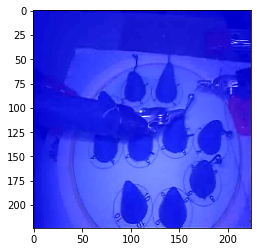

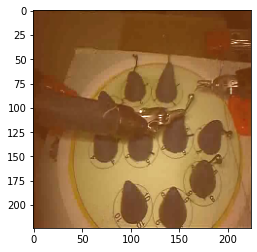

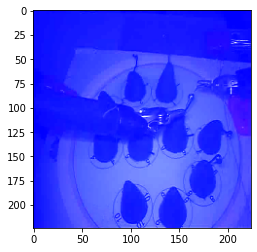

In [54]:
#img=imread(imgs_test[fr_num][0])
img=imread(imgs_train[fr_num][0])
mask_color_img(cv2.resize(img, (224,224)), temp[:,:,1],temp[:,:,2], temp[:,:,0],fname='pred'+par)